In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('AdBlue data.csv', 
    index_col='transaction_date', 
    usecols=['transaction_date', 'volume'],
    date_format="%d/%m/%Y"
)
volumes = df['volume']

df.head()

,volume
transaction_date,
4/23/13,10.0
4/24/13,0.0
4/25/13,0.0
4/26/13,0.0
4/27/13,0.0


In [ ]:
results = seasonal_decompose(df)
results.plot()
plt.show()

In [3]:
results = seasonal_decompose(df, model='multiplicative')
results.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 4/23/13 to 11/3/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  4213 non-null   float64
dtypes: float64(1)
memory usage: 65.8+ KB


In [ ]:
df.plot()

In [5]:
result = adfuller(volumes)

In [6]:
i = 0
while result[1] > 0.05:
    i+=1
    df['volume'] = df['volume'].diff(i)
    df = df.dropna()
    result = adfuller(df['volume'])
    stationary_interpretation = 'Stationary' if result[1] < 0.05 else 'Non-Stationary'
    print(f"Iteration {i}")
    print(f"ADF Statistic after differencing: {result[0]}")
    print(f"P Value: {result[1]}")
    print(f"Interpretation: {stationary_interpretation}")



Iteration 1
ADF Statistic after differencing: -17.823259691066355
P Value: 3.154756141583101e-30
Interpretation: Stationary


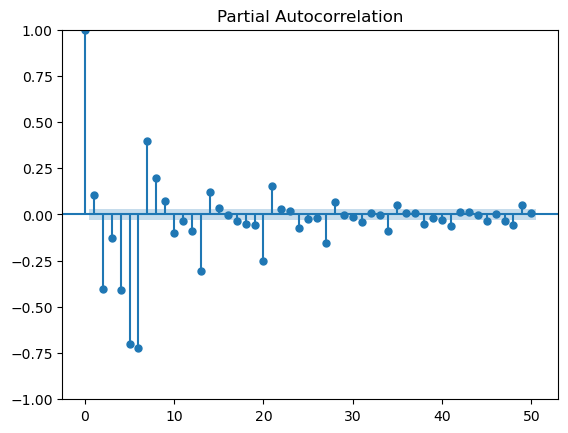

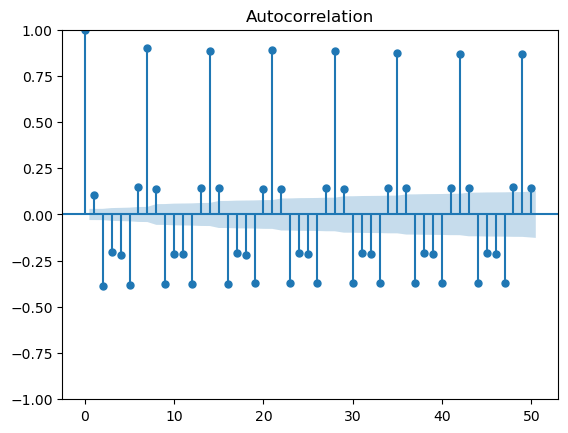

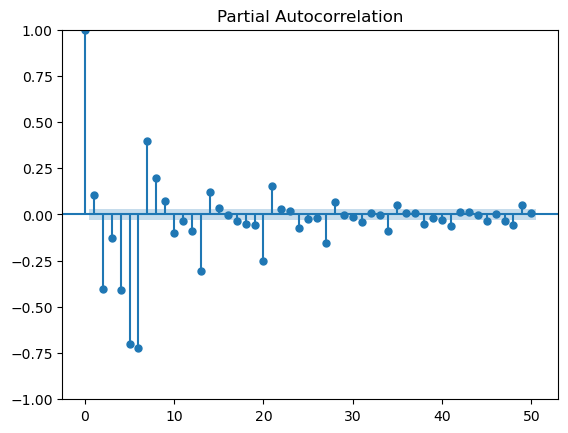

In [7]:
plot_acf(df['volume'], lags=50)
plot_pacf(df['volume'], lags = 50)

In [8]:
p, d, q = 1, 0, 7
model = ARIMA(df['volume'], order=(p,d,q))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                 4212
Model:                 ARIMA(1, 0, 7)   Log Likelihood              -43315.660
Date:                Thu, 07 Nov 2024   AIC                          86651.320
Time:                        11:12:23   BIC                          86714.777
Sample:                    04-24-2013   HQIC                         86673.755
                         - 11-03-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7967     22.479      0.124      0.901     -41.260      46.854
ar.L1         -0.1091      0.074     -1.482      0.138      -0.253       0.035
ma.L1         -0.0859      0.045     -1.921      0.055      -0.174       0.002
ma.L2         -0.4095      0.025    -16.253      0.000      -0.459      -0.360
ma.L3         -0.2280      0.025     -9.085      0.000      -0.277      -0.179
ma.L4         -0.3430      0.022    -15.730      0.000      -0.386      -0.300
ma.L5         -0.4273      0.027    -15.733      0.000      -0.481      -0.374
ma.L6         -0.0205      0.025     -0.829      0.407      -0.069       0.028
ma.L7          0.6092      0.023     26.033      0.000       0.563       0.655
sigma2      9.127e+07      4e-05   2.28e+12      0.000    9.13e+07    9.13e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):              1852.12
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              13.60   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+28. Standard errors may be unstable.
"""

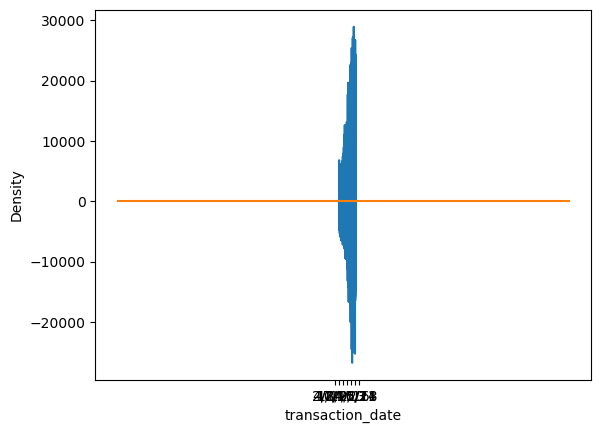

In [9]:
residuals = model_fit.resid
residuals.plot()
residuals.plot(kind='kde')
plt.show()


In [10]:
data = df['volume']
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [11]:
model = ARIMA(train, order=(p, d, q))
forecast = model_fit.forecast(steps=len(test))
print(forecast)

/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

2024-11-04    15976.921004
2024-11-05     2177.660545
2024-11-06     6214.287584
2024-11-07     3983.179266
2024-11-08      373.214806
                  ...     
2027-02-20        2.796750
2027-02-21        2.796750
2027-02-22        2.796750
2027-02-23        2.796750
2027-02-24        2.796750
Freq: D, Name: predicted_mean, Length: 843, dtype: float64


/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


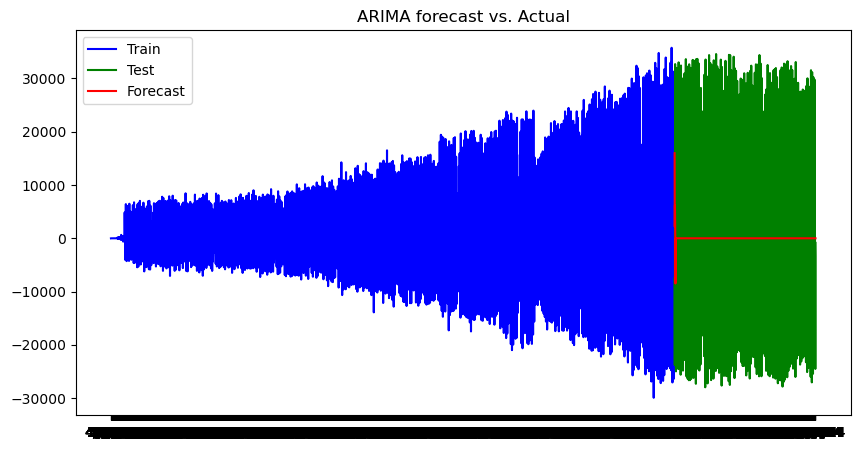

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data.index[:train_size], train, label='Train', color='blue')
plt.plot(data.index[train_size:], test, label='Test', color='green')
plt.plot(data.index[train_size:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA forecast vs. Actual')
plt.show()